# WeatherPy

---

##  Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
import datetime
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

#!pip install citipy

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
City_data = pd.DataFrame({"City": cities})

City_data["Country"] = ""
City_data["Date"] = ""      
City_data["Latitude"] = ""
City_data["Longitude"] = ""
City_data["Cloudiness (%)"] = ""
City_data["Humidity (%)"] = ""
City_data["Max Temp (F)"] = ""
City_data["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        City_data.loc[index, "Country"] = weather_response["sys"]["country"]     
        City_data.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        City_data.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        City_data.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        City_data.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        City_data.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        City_data.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
        City_data.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])       
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | adamstown.
Processing Record 1  of Set 1 | kargopol'.
Processing Record 2  of Set 1 | saipan.
Processing Record 3  of Set 1 | bredasdorp.
Processing Record 4  of Set 1 | utrik.
Processing Record 5  of Set 1 | manta.
Processing Record 6  of Set 1 | bethel.
Processing Record 7  of Set 1 | albany.
Processing Record 8  of Set 1 | ciudad tula.
Processing Record 9  of Set 1 | enshi.
Processing Record 10  of Set 1 | thompson.
Processing Record 11  of Set 1 | dakhla.
Processing Record 12  of Set 1 | fort st. john.
Processing Record 13  of Set 1 | gazli.
Processing Record 14  of Set 1 | yellowknife.
Processing Record 15  of Set 1 | tromso.
Processing Record 16  of Set 1 | iqaluit.
Processing Record 17  of Set 1 | lihue.
Processing Record 18  of Set 1 | pisco.
Processing Record 19  of Set 1 | roja.
Processing Record 20  of Set 1 | padegan-e manjil.
City not found...skipping padegan-e manjil.
Processing Record 

Processing Record 27  of Set 4 | gunjur.
Processing Record 28  of Set 4 | morden.
Processing Record 29  of Set 4 | dedza.
Processing Record 30  of Set 4 | mejit.
Processing Record 31  of Set 4 | tupelo.
Processing Record 32  of Set 4 | port elizabeth.
Processing Record 33  of Set 4 | huarmey.
Processing Record 34  of Set 4 | nemuro.
Processing Record 35  of Set 4 | klyuchi.
Processing Record 36  of Set 4 | aparri.
Processing Record 37  of Set 4 | melito di porto salvo.
Processing Record 38  of Set 4 | vrable.
Processing Record 39  of Set 4 | sitia.
Processing Record 40  of Set 4 | la passe.
Processing Record 41  of Set 4 | margate.
Processing Record 42  of Set 4 | motueka.
Processing Record 43  of Set 4 | elmina.
Processing Record 44  of Set 4 | andalgala.
Processing Record 45  of Set 4 | tiksi.
Processing Record 46  of Set 4 | tura.
Processing Record 47  of Set 4 | revelstoke.
Processing Record 48  of Set 4 | genhe.
Processing Record 49  of Set 4 | susuman.
Processing Record 0  of Set

Processing Record 13  of Set 8 | myadzyel.
Processing Record 14  of Set 8 | aykhal.
Processing Record 15  of Set 8 | vingt cinq.
City not found...skipping vingt cinq.
Processing Record 16  of Set 8 | fort mcmurray.
Processing Record 17  of Set 8 | kiri buru.
Processing Record 18  of Set 8 | jayapura.
Processing Record 19  of Set 8 | grand-lahou.
Processing Record 20  of Set 8 | shingu.
Processing Record 21  of Set 8 | kataba.
Processing Record 22  of Set 8 | island harbour.
Processing Record 23  of Set 8 | mandera.
Processing Record 24  of Set 8 | whyalla stuart.
City not found...skipping whyalla stuart.
Processing Record 25  of Set 8 | nadym.
Processing Record 26  of Set 8 | coari.
Processing Record 27  of Set 8 | kismayo.
Processing Record 28  of Set 8 | stettler.
Processing Record 29  of Set 8 | meadow lake.
Processing Record 30  of Set 8 | sete.
Processing Record 31  of Set 8 | neiafu.
Processing Record 32  of Set 8 | princeville.
Processing Record 33  of Set 8 | ejido benito juare

Processing Record 42  of Set 11 | shimoda.
Processing Record 43  of Set 11 | ventspils.
Processing Record 44  of Set 11 | boromo.
Processing Record 45  of Set 11 | yuzhnoural'sk.
Processing Record 46  of Set 11 | borgarnes.
Processing Record 47  of Set 11 | gunnedah.
Processing Record 48  of Set 11 | tarnow.
Processing Record 49  of Set 11 | kushk.
Processing Record 0  of Set 12 | mormugao.
Processing Record 1  of Set 12 | pitea.
Processing Record 2  of Set 12 | copiapo.
Processing Record 3  of Set 12 | kasserine.
Processing Record 4  of Set 12 | port lincoln.
Processing Record 5  of Set 12 | petrosino.
Processing Record 6  of Set 12 | stjordalshalsen.
Processing Record 7  of Set 12 | santa elena de uairen.
Processing Record 8  of Set 12 | newman.
Processing Record 9  of Set 12 | beni.
Processing Record 10  of Set 12 | bom jesus.
Processing Record 11  of Set 12 | xingcheng.
Processing Record 12  of Set 12 | kataragama.
City not found...skipping kataragama.
Processing Record 13  of Set 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
City_data.sort_values(by='City', ascending=True)
City_data.head()


# Show Record Count
City_data.count()

City                630
Country             630
Date                630
Latitude            630
Longitude           630
Cloudiness (%)      630
Humidity (%)        630
Max Temp (F)        630
Wind Speed (mph)    630
dtype: int64

In [14]:
# Display sample data
City_data.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,maroantsetra,PN,2023-10-30 06:11:24,-25.066,-130.1015,100,80,72.896,4.21
1,wailua homesteads,RU,2023-10-30 06:11:24,61.5071,38.9456,68,74,27.266,2.55
2,ciacova,MP,2023-10-30 06:11:25,15.1355,145.701,0,78,83.372,5.66
3,bilibino,ZA,2023-10-30 06:11:25,-34.5322,20.0403,0,39,67.604,10.48
4,sierra grande,MH,2023-10-30 06:11:25,11.2278,169.8474,100,84,82.85,9.8


In [15]:
# Export the City_Data into a csv
City_data.to_csv("D:/MSU DATA/Module6_challenge/Starter_Code/Starter_Code/output_data/cities.output.csv", index_label="City_ID")

In [16]:
# Read saved data
City_data = pd.read_csv("D:/MSU DATA/Module6_challenge/Starter_Code/Starter_Code/output_data/cities.output.csv", index_col="City_ID")

# Display sample data
City_data.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,maroantsetra,PN,2023-10-30 06:11:24,-25.0660,-130.1015,100.0,80.0,72.896,4.21
1,wailua homesteads,RU,2023-10-30 06:11:24,61.5071,38.9456,68.0,74.0,27.266,2.55
2,ciacova,MP,2023-10-30 06:11:25,15.1355,145.7010,0.0,78.0,83.372,5.66
3,bilibino,ZA,2023-10-30 06:11:25,-34.5322,20.0403,0.0,39.0,67.604,10.48
4,sierra grande,MH,2023-10-30 06:11:25,11.2278,169.8474,100.0,84.0,82.850,9.80


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

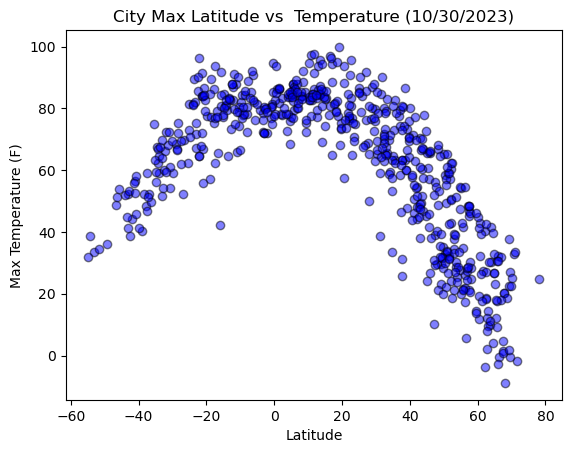

In [22]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(City_data["Latitude"]).astype(float), pd.to_numeric(City_data["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Max Latitude vs  Temperature ({today})")
plt.show()

#### Latitude Vs. Humidity

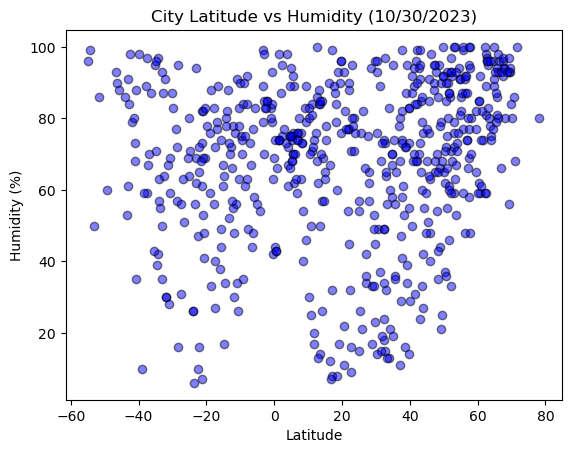

In [23]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(City_data["Latitude"]).astype(float), pd.to_numeric(City_data["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
plt.show()

#### Latitude Vs. Cloudiness

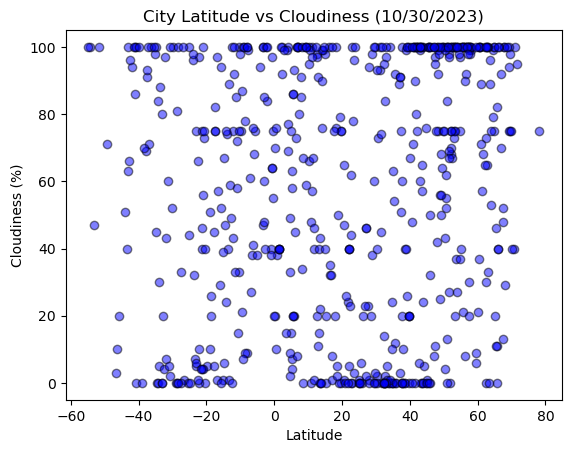

In [24]:
# Build the scatter plots for latitude vs. cloudiness

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(City_data["Latitude"]).astype(float), pd.to_numeric(City_data["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.show()

#### Latitude vs. Wind Speed Plot

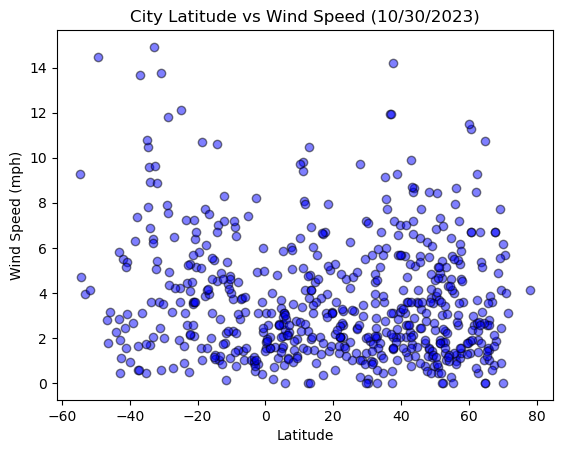

In [25]:
# Build the scatter plots for latitude vs. wind speed

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(City_data["Latitude"]).astype(float), pd.to_numeric(City_data["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
northern_df = City_data.loc[pd.to_numeric(City_data["Latitude"]).astype(float) > 0, :]
southern_df = City_data.loc[pd.to_numeric(City_data["Latitude"]).astype(float) < 0, :]

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
1,wailua homesteads,RU,2023-10-30 06:11:24,61.5071,38.9456,68.0,74.0,27.266,2.55
2,ciacova,MP,2023-10-30 06:11:25,15.1355,145.7010,0.0,78.0,83.372,5.66
4,sierra grande,MH,2023-10-30 06:11:25,11.2278,169.8474,100.0,84.0,82.850,9.80
6,port-aux-francais,US,2023-10-30 06:11:26,41.3712,-73.4140,100.0,89.0,50.630,2.06
7,cargados carajos,US,2023-10-30 06:11:26,42.6001,-73.9662,100.0,94.0,48.074,2.24
...,...,...,...,...,...,...,...,...,...
617,tasbuget,MX,2023-10-30 06:14:25,21.2311,-86.7310,26.0,77.0,73.724,2.35
618,taiobeiras,RU,2023-10-30 06:14:26,59.5667,150.8000,9.0,77.0,13.802,1.28
620,rongelap,RU,2023-10-30 06:14:26,63.7553,121.6247,96.0,96.0,11.264,1.79


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Display sample data
southern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,maroantsetra,PN,2023-10-30 06:11:24,-25.0660,-130.1015,100.0,80.0,72.896,4.21
3,bilibino,ZA,2023-10-30 06:11:25,-34.5322,20.0403,0.0,39.0,67.604,10.48
5,constantia,EC,2023-10-30 06:07:56,-0.9500,-80.7333,40.0,83.0,77.054,3.60
18,vadso,PE,2023-10-30 06:11:29,-13.7000,-76.2167,40.0,88.0,64.724,1.03
21,buka,CC,2023-10-30 06:11:30,-12.1568,96.8225,75.0,78.0,82.652,7.20


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8573412580702492


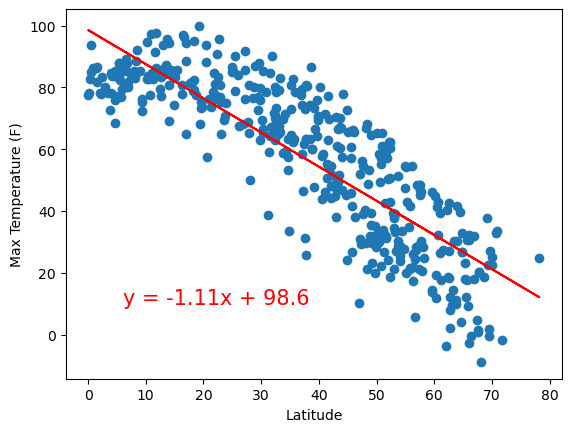

In [35]:
# Linear regression on Northern Hemisphere

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7801156368059098


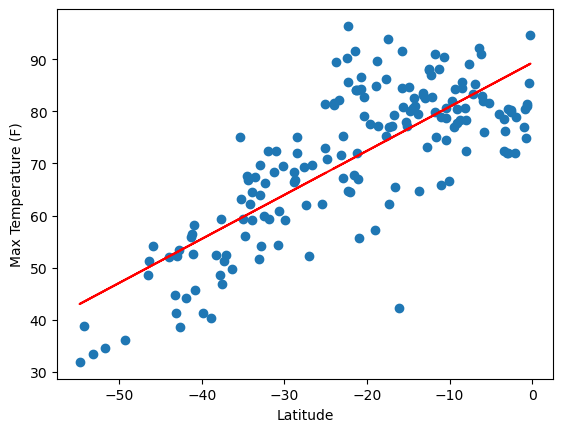

In [38]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The scatter plot maps Southern Hemisphere and Max temperature against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.3x + 58.21
The r-squared is: 0.25107562424018776


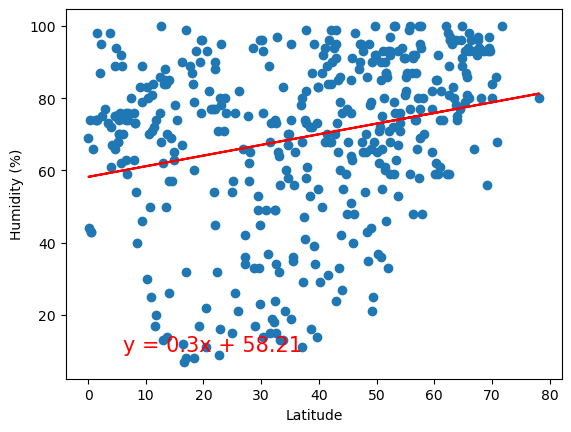

In [39]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = -0.04x + 65.31
The r-squared is: -0.0223186827764902


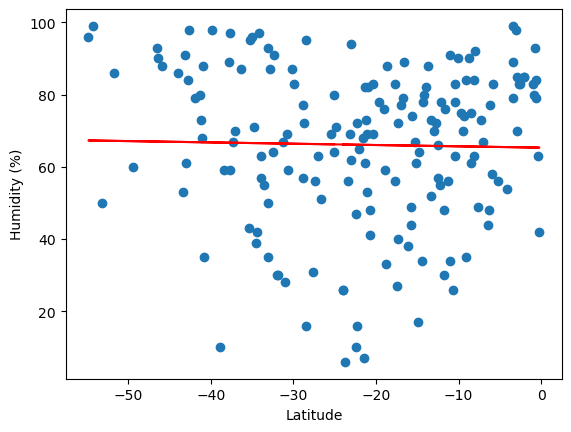

In [40]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The scatter plot maps southern Hemisphere and Southern cities' Humidity against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator Humidity. The farther to the equator, the higher the Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.41x + 42.62
The r-squared is: 0.2098859112540252


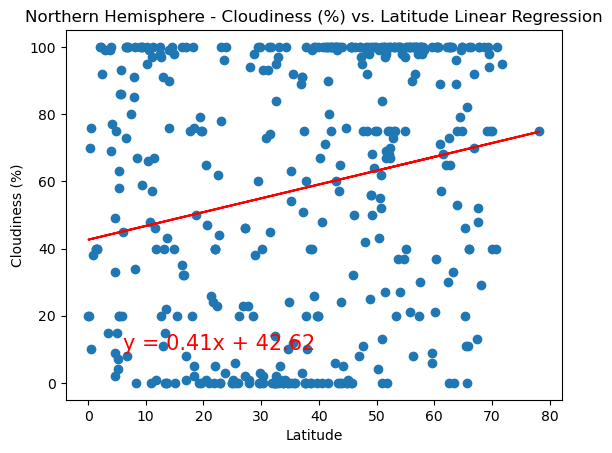

In [41]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.05x + 55.46
The r-squared is: 0.01849419859331845


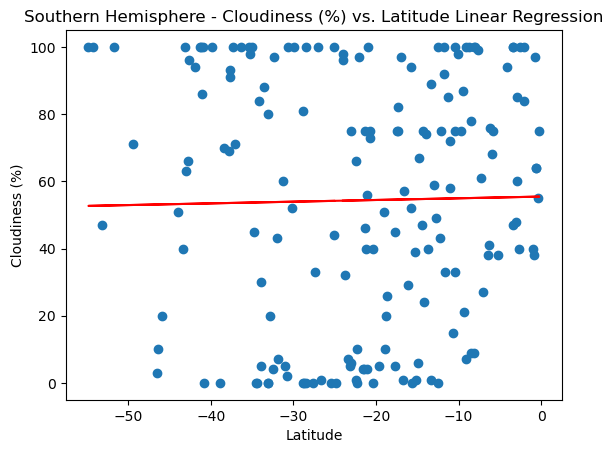

In [44]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern Hemisphere and Southern cities' cloudiness against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator cloudiness. The farther to the equator, the higher the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 3.09
The r-squared is: 0.06281207918651407


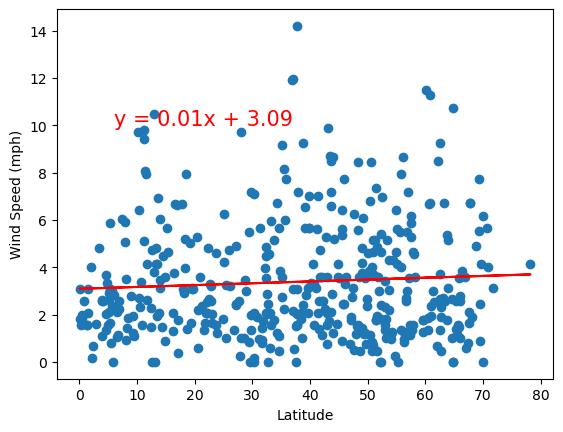

In [45]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = -0.05x + 3.12
The r-squared is: -0.22136548757053198


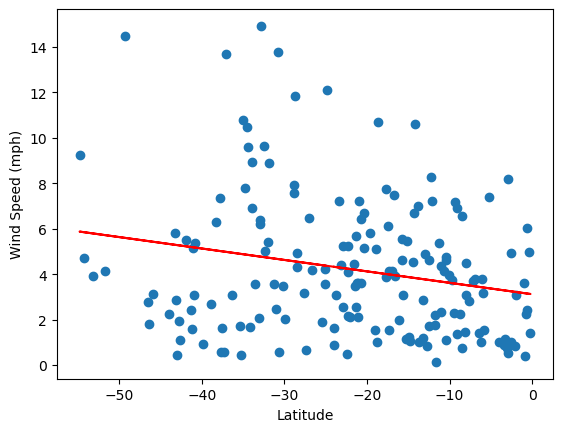

In [46]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern Hemisphere and Southern cities' Windspeed against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator Windspeed. The farther to the equator, the higher the Windspeed.